### Read Korean Ballad Lyrics Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
# designate root path for the data
DATA_ROOT_PATH = "./data"

# designate path for each dataset files
LYRIC_PATH = os.path.join(DATA_ROOT_PATH, "lyrics_kor.txt")
BILLBOARD_PATH = os.path.join(DATA_ROOT_PATH, "rawdata_김지훈_201500844.tsv")
GEULSTAGRAM_PATH = os.path.join(DATA_ROOT_PATH, "geulstagram.csv")

In [3]:
# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

sample_lyrics = read_txt(LYRIC_PATH)[:10]
sample_lyrics

['내 곁에서 떠나가지 말아요 \n',
 '그대없는 밤은 너무 쓸쓸해 \n',
 '그대가 더 잘 알고 있잖아요 \n',
 '제발 아무말도 하지 말아요\n',
 '나약한 내가 뭘 할수 있을까 생각을 해봐\n',
 '그대가 내겐 전부였었는데 음~오 \n',
 '제발 내 곁에서 떠나가지 말아요\n',
 '그대없는 밤은 너무 싫어\n',
 '우~우~우~ 돌이킬수 없는 그대 마음 \n',
 '우~우~우~ 이제와서 다시 어쩌려나\n']

In [4]:
import numpy as np

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [5]:
import re

stopwords = [
    "사연을 읽어주는 여자",
    "메시지 지금 동건 글",
    "전송됨",
    "가희 글",
    "공유",
    "댓글",
    "오후",
    "오전"
    "등등",
    "중략",
    "신중근",
    "신중군"
    "글 사진"
]

# make preprocessing function
def preprocess(list_lines:list) -> list:
    # remove \n
    removed_lines = [line.strip() for line in list_lines]

    # filter stopwords from the line item in list_lines using regex
    removed_lines = []
    for line in list_lines:
        for stopword in stopwords:
            line = re.sub(stopword, '', line)
        removed_lines.append(line)

    # remove empty lines
    removed_lines = [line for line in removed_lines if line]
    
    # remove duplicate elements from the removed_lines
    removed_lines = list(set(removed_lines))

    # strip whitespace
    removed_lines = [sentence.strip() for sentence in removed_lines]

    # remove tabs
    removed_lines = [sentence.replace('\t', '') for sentence in removed_lines]

    # remove double spaces or longer spaces into single space
    for i in range(2,5):
        removed_lines = [sentence.replace(' '*i, ' ') for sentence in removed_lines]

    # remove one letter items
    removed_lines = [sentence for sentence in removed_lines if len(sentence) > 1]

    return removed_lines

preprocess(sample_lyrics)

['내 곁에서 떠나가지 말아요',
 '나약한 내가 뭘 할수 있을까 생각을 해봐',
 '제발 내 곁에서 떠나가지 말아요',
 '제발 아무말도 하지 말아요',
 '우~우~우~ 이제와서 다시 어쩌려나',
 '우~우~우~ 돌이킬수 없는 그대 마음',
 '그대없는 밤은 너무 싫어',
 '그대가 내겐 전부였었는데 음~오',
 '그대가 더 잘 알고 있잖아요',
 '그대없는 밤은 너무 쓸쓸해']

### Read Korean Billboard Song dataset

In [6]:
# read and load from tsv
df_billboard = pd.read_csv(BILLBOARD_PATH, sep='\t')
print(df_billboard.shape)
df_billboard.head(3)

(2276, 5)


,ID,Year,Title,Singer,Lyric
0,1,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...
1,2,1964,마도로스 부기,백야성,항구의 일~~번지 부기우기 일~번지 그라스를 채워~다오 부기우기 아~~가씨 고동이 ...
2,3,1964,이국땅,남일해,하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...


In [7]:
# filter by year where year is greater than 2015
df_billboard_recent = df_billboard[df_billboard['Year'] > 2010]
# remove row where Lyric contains "청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다."
df_billboard_recent = df_billboard_recent[df_billboard_recent['Lyric'].str.contains("청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다.") == False]
# display head of the dataframe
df_billboard_recent.head(3)

,ID,Year,Title,Singer,Lyric
1832,1833,2011,여우야,투개월,창 밖엔 서글픈 비만 내려오네 내 마음 너무 안타까워 이제 다시 볼 수가 없기에 처...
1833,1834,2011,Lonely,2NE1,지금 내가 하는 얘기 널 아프게 할지 몰라 아마 날 죽도록 미워하게 될 꺼야 내가 ...
1834,1835,2011,나만 몰랐던 이야기,아이유,정말 넌 다 잊었더라 반갑게 날 보는 너의 얼굴 보니 그제야 어렴풋이 아파오더라 새...


### Read Geulstagram dataset

In [8]:
df_geulstagram = pd.read_csv(GEULSTAGRAM_PATH)
print(df_geulstagram.shape)
df_geulstagram.head(3)

(25179, 8)


,Unnamed: 0,USER_ID,Image_Content_txt,Image_Content_txt_result,Content_txt,Hashtags,Hashtags_result,Spell_Checked_Content
0,0,1day1poem,XXL 칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 ...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뻣뻣한 것을 다 벌...,"['가능하면1일1시', '190706', '임재건', '1일1시', '다시는사랑이없...","['자작시', '시', '시스타그램', '감성', '감성글', '공감', '공감글'...",칫솔은 새것인데 솔질이 새것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어진 ...
1,1,1day1poem,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라...,"['가능하면1일1시', '190701', '임재건', '다시는사랑이없을줄알았습니다'...","['벗', '혐오', '호불호', '자작시', '시', '시스타그램', '감성', ...",아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라....
2,2,1day1poem,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 ...,"['가능하면1일1시', '190807', '임재건', '1일1시', '다시는사랑이없...","['달달', '달', '초승달', '보름달', '밤', '하늘', '자작시', '시...",어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...


In [9]:
# check non null items in the dataframe
df_geulstagram.isnull().sum()

Unnamed: 0                    0
USER_ID                       0
Image_Content_txt             0
Image_Content_txt_result     30
Content_txt                   0
Hashtags                      0
Hashtags_result               0
Spell_Checked_Content       616
dtype: int64

In [10]:
# drop null items
df_geulstagram.dropna(inplace=True)

### Concatanate Ballad, Billboard, Geulstagram into one list

In [11]:
list_poetic_sentences = []

# load lists
list_lyrics = read_txt(LYRIC_PATH)
list_billboard = df_billboard_recent['Lyric'].tolist()
list_geulstagram = df_geulstagram['Spell_Checked_Content'].tolist()

# concatenate lists
list_poetic_sentences = list_lyrics + list_billboard + list_geulstagram
print(len(list_poetic_sentences))

sampling(list_poetic_sentences, 10)

87342


['그 믿음조차 무색한 것은\n',
 '\n',
 '화를내다 웃고마는\n',
 '\n',
 '작은 슬픔은 지금은 모두 안녕\n',
 '그대를 바랄볼 수 있는 것만으로\n',
 '깜깜한 우린 달콤한 열매를 나눠먹고 이곳에 누워 눈을 감는다 내 옆에서 작게 숨 쉬는 너의 존재는 달도 없고 별도 없는 깊은 심해 속으로 나를 데려가 수천 톤의 수압보다 무거운 이불을 덮고 너와 나만이 있는 영원한 잠을 나는 자고 싶어라',
 '시간은 멀어짐으로 향해 가는데\n',
 '오늘도 내 가슴에\n',
 '그 사람의 대한 기대를 하게 되면 기대한 만큼 실망이 크다 실망 이명국']

In [12]:
import kss
from tqdm import tqdm

def break_sentence(list_sentences:list) -> list:
    """ 
    break the string items of the into sentences (sentence segmentation)
    """
    
    # strip whitespace
    list_sentences = [sentence.strip() for sentence in list_sentences]

    # remove \n
    list_sentences = [sentence.replace('\n', '') for sentence in list_sentences]

    # drop empty items
    list_sentences = [sentence for sentence in list_sentences if sentence]

    sentence_list = []
    
    # split string item into sublist
    # https://github.com/hyunwoongko/kss/
    for item in tqdm(list_sentences):
        item = kss.split_sentences(
            item, # batch input rather than single string
            backend = "pynori", # default is pynori. mecab 5x is faster than pynori: https://github.com/hyunwoongko/kss/blob/main/docs/ANALYSIS.md#11-open-ended-segmentation
            num_workers = -1, # use maximum workers as possible
            use_heuristic = True
            )
        sentence_list.extend(item)

    # apply preprocessing function for each item in line_sentences
    sentence_list = preprocess(sentence_list)

    # drop empty items
    sentence_list = [sentence for sentence in sentence_list if sentence]

    # drop duplicate items
    sentence_list = list(set(sentence_list))

    return sentence_list

sample_sentences = break_sentence(list_poetic_sentences[:10])
print(len(sample_sentences))
sample_sentences

100%|██████████| 10/10 [00:12<00:00,  1.29s/it]

10


['그대가 내겐 전부였었는데 음~오',
 '나약한 내가 뭘 할수 있을까 생각을 해봐',
 '제발 아무말도 하지 말아요',
 '그대없는 밤은 너무 싫어',
 '그대가 더 잘 알고 있잖아요',
 '우~우~우~ 돌이킬수 없는 그대 마음',
 '그대없는 밤은 너무 쓸쓸해',
 '제발 내 곁에서 떠나가지 말아요',
 '내 곁에서 떠나가지 말아요',
 '우~우~우~ 이제와서 다시 어쩌려나']

In [13]:
# 8 hours(est) per 80000 sentences when using pynori tokenizer
breaken_down_sentences = break_sentence(list_poetic_sentences)
len(breaken_down_sentences)

100%|██████████| 79483/79483 [8:28:09<00:00,  2.61it/s]


82989

In [14]:
# save the list of sentences to a txt file
with open(os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt"), 'w', encoding='utf-8') as f:
    for sentence in breaken_down_sentences:
        f.write(sentence + '\n')


### EDA (Work in Progress)

In [15]:
# read dataset from poetic_sentences_kor.txt
path = os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt")
list_loaded = read_txt(path)
len(list_loaded)

82989

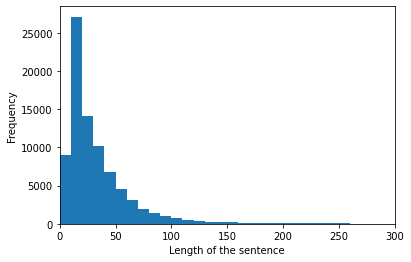

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 10 characters
plt.hist(list(map(len, list_loaded)), bins=np.arange(0, max(list(map(len, list_loaded)))+1, 10))
plt.xlim(0, 300) # set x tick limit to 300
plt.xlabel("Length of the sentence")
plt.ylabel("Frequency")
plt.show()

In [23]:
# get proportion of sentences where length is longer than 50
length = 50
list_long = list(filter(lambda x: len(x) > length, list_loaded))
print(len(list_long) , len(list_long) / len(list_loaded))
sampling(list_long, 10)

15210 0.1832773018110834


['기대하며 누군가에게 마음을 주는 건 아니지만 이 밤 문득문득 내가 전했던 마음이 상대에게 닿지 않아 가끔은 쓸쓸하고 외롭다.\n',
 '사랑했던 사람조차 떠나버리고 다시 또 홀로가 되어버린 난 둘이서 매일 걸었던 거리가 낯설게만 느껴졌다\n',
 '당신이 아무리 올바른 길 위에 서 있다고 해도 제자리에 가만히 있는다면 어떤 목표도 이룰 수 없다.\n',
 '그래서 너의 색은 이렇고 나의 색을 이럴 수밖에 없는 거니까. 하지만 그래서 재미있는 게 관계를 만들어나가는 과정이 아닐까.\n',
 '믿었던 사람이 내 편이 아닐 때 위로받을 곳이 없다고 느낄 때 내 못난 모습을 감추려고 애쓸 때 나 혼자 잘해주고 상처받을 때 지금 있는 곳에서 내가 필요 없다고 느낄 때 반드시 이별해야 할 때\n',
 '다시 여기 바닷가 이제는 말하고 싶어 네가 있었기에 내가 더욱 빛나 별이 되었다고 시간의 강을 건너 또 맞닿은 너와 나 소중한 사랑을 영원히 간직해줘 지난여름 바닷가 너와 나 단둘이 파도에 취해서 노래하며 같은 꿈을 꾸었지\n',
 '당신의 말과 행동 모두 지나치지 않을게요 하지만 당신을 향한 제 사랑 표현은 지나칠 거예요\n',
 '더는 할 말이 없어 다른 이유도 어떤 변명도 난 의미 없단 걸 알아 끝이란 게 다 그렇잖아\n',
 '어떻게 보면 동생은 지금까지 살아온 삶 중에서 떠나는 준비를 하면서 더 열심히 살지 않았을까?\n',
 '거짓말하지 말던가 무표정하게 돌아서곤 우는 건 들키지나 말던가 어둠을 틈타 집 앞을 서성이지 말던가 모르는 번호로 전화하고 말없이 끊지나 말던가 헤어졌으면 내 마음에 보이 지나 말던가\n']

### Remove Names from the sentences (Work in Progress)

In [18]:
# using NER tagging function of pororo: https://kakaobrain.github.io/pororo/tagging/ner.html
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")
pos_tagged = ner('데일 카네기 인간관계론')
pos_tagged

[('데일 카네기', 'PERSON'), (' ', 'O'), ('인간관계론', 'THEORY')]

In [19]:
from tqdm import tqdm
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")

sample_list = [
    '감성 조각사 한웅',
    '전송됨',
    '요즘은 얼리버드라는 할인 상품도 많고',
    '널 사랑하는 건 힘들지 않아 사랑하지 않는 게 힘든 거지 차돌',
    '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서',
]

# filter "PERSON" tags from the list
def filter_person(list_sentences:list) -> list:
    """ takes too long :( """
    for item in tqdm(list_sentences):
        list_pos_tagged = ner(item)
        for string, pos_tag in list_pos_tagged:
            if pos_tag == "PERSON":
                list_sentences.remove(item)
    return list_sentences

# filter_person(sample_list)

In [20]:
# check the distribution of the starting character of the list_poetic_sentences
# "가", "나","다" 등 시작하는 글자들에 따른 분포 확인할 필요 있음